In [415]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
import os

In [416]:
def oob_score(execution_data: dict) -> float:
    if not execution_data['success']:
        return -1
    
    oobs = execution_data['out_of_bounds']
    length = execution_data['length']
    OOBS_RATION_VALUE = 100
    score = (sum(oobs) / length) * OOBS_RATION_VALUE
    return score

In [417]:
def avg_velocity(execution_data: dict) -> float:
    vel_array = execution_data['velocity']

    velocities = [np.linalg.norm(vel) for vel in vel_array]
    return np.mean(velocities)

In [418]:
RESULTS_PATH = Path('results')
osm_results = RESULTS_PATH / 'osm'
ga_results = RESULTS_PATH / 'ga'

In [419]:
def parse_execution_data(data_file: Path):
    with open(data_file, "r") as f:
        x = json.load(f)
    
    return [
        x['name'],
        x['length'],
        x['n_points'],
        x['success'],
        oob_score(x),
        avg_velocity(x),
    ]

In [420]:
df_data = []
for item in osm_results.iterdir():
    if item.suffix == ".json":
        df_data.append(parse_execution_data(item))

In [421]:
df = pd.DataFrame(df_data, 
                  columns=['Name', 'Length', "N Points", "Success", "OOB Score", "AVG Velocity"])
df["Success"]

0      True
1     False
2      True
3      True
4      True
      ...  
92     True
93     True
94    False
95     True
96     True
Name: Success, Length: 97, dtype: bool

In [422]:
# df = df.sort_values("OOB Score")
df[["Name", "Length", "N Points", "OOB Score", "AVG Velocity"]].tail(n=8)

,Name,Length,N Points,OOB Score,AVG Velocity
89,Wessenden Close,70.552831,6,0.031614,6.373897
90,Whinby Croft,51.898842,4,0.000000,5.453781
91,Whitehead Close,94.809774,16,0.375775,8.663797
92,Whitehill Avenue,148.173819,8,0.000000,11.621581
93,Wincanton Close,93.743375,6,0.148915,6.345864
94,Winn Drive,116.574514,30,-1.000000,1.662593
95,Wordsworth Road,132.757307,16,0.000000,8.541508
96,Wyn Grove,64.775826,12,0.000000,6.286640


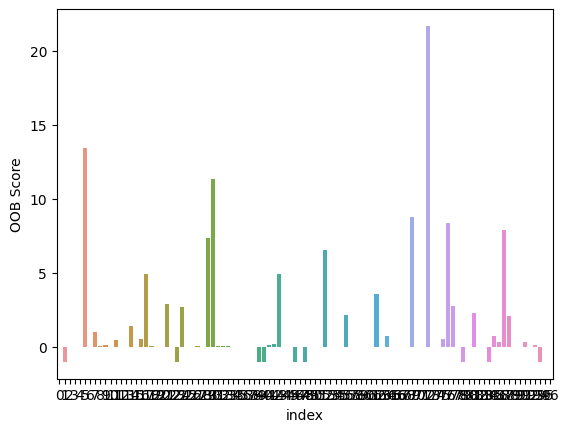

In [423]:
import seaborn as sns
ax = sns.barplot(data=df.reset_index(), y="OOB Score", x="index")

In [424]:
df = df.where(df["Success"])


(97, 6)

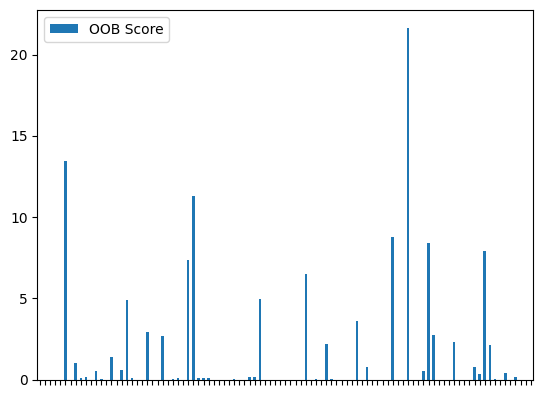

In [425]:

ax = df.plot( y='OOB Score', kind="bar",rot=45)
ax.set_xticklabels([])
df.shape
# ax.set_xticklabels()

In [426]:
df_data = []
for item in ga_results.iterdir():
    if item.suffix == ".json":
        df_data.append(parse_execution_data(item))

df = pd.DataFrame(df_data, 
                  columns=['Name', 'Length', "N Points", "Success", "OOB Score", "AVG Velocity"])

(104, 6)

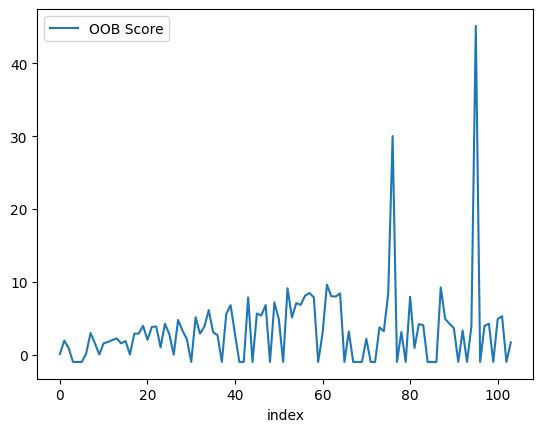

In [427]:
# df = df.sort_values("OOB Score")

df.reset_index().plot(x='index', y='OOB Score')
df.shape

In [428]:
df.tail()

,Name,Length,N Points,Success,OOB Score,AVG Velocity
99,GA road,127.292753,20,False,-1.000000,0.213777
100,GA road,125.134719,20,True,4.877659,5.280309
101,GA road,124.766825,20,True,5.287020,5.177191
102,GA road,125.844460,20,False,-1.000000,1.212681
103,GA road,131.374555,20,True,1.681281,5.154999
